In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


In [53]:
path_in = "twitterClimateData.csv"
df = pd.read_csv(path_in, delimiter=";")
df = df.sample(1000)
df = df[pd.notnull(df["text"])]

In [54]:
col = ["search_hashtags", "text"]
df = df[col]
df = df[pd.notnull(df["text"])]
df.columns = ["search_hashtags", "text"]
df['category_id'] = df["search_hashtags"].factorize()[0]
category_id_df = df[["search_hashtags", 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', "search_hashtags"]].values)
df.head()

,search_hashtags,text,category_id
29528,#climateaction,To get better #energyefficiency for #buildings...,0
4454,#climatechange,Thank you @adrs for keeping it real about #Cli...,1
68390,#climatecrisis,Death and resurrection in the rainforest as bi...,2
65375,#climatechange,Please think about using re-usable cups (inste...,1
47094,#climatestrike,Who wouldn’t want a leader like this? This is ...,3


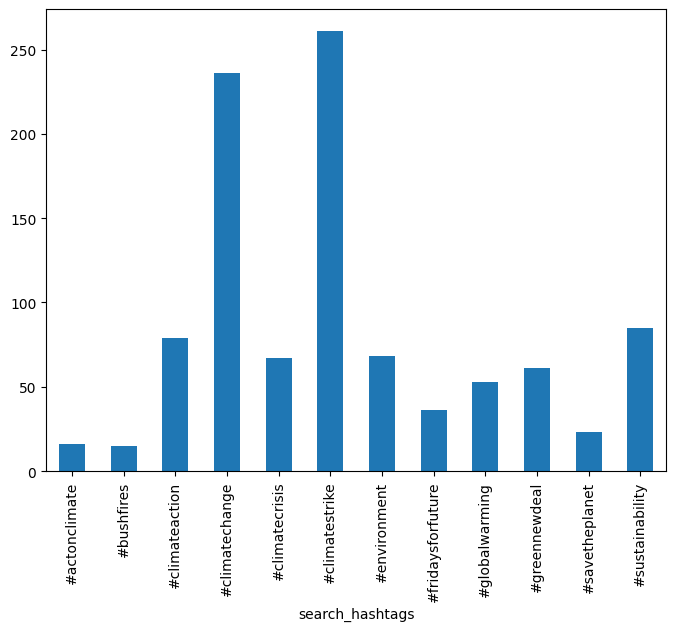

In [55]:
fig = plt.figure(figsize=(8,6))
df.groupby("search_hashtags").text.count().plot.bar(ylim=0)
plt.show()


In [56]:
df.groupby("search_hashtags").text.count()

search_hashtags
#actonclimate         16
#bushfires            15
#climateaction        79
#climatechange       236
#climatecrisis        67
#climatestrike       261
#environment          68
#fridaysforfuture     36
#globalwarming        53
#greennewdeal         61
#savetheplanet        23
#sustainability       85
Name: text, dtype: int64

In [57]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.text).toarray()
labels = df.category_id
features.shape

(1000, 550)

In [58]:
N = 2
for search_hashtags, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(search_hashtags))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# '#actonclimate':
  . Most correlated unigrams:
. pass
. actonclimate
  . Most correlated bigrams:
. global warming
. climatechange https
# '#bushfires':
  . Most correlated unigrams:
. nsw
. bushfires
  . Most correlated bigrams:
. www instagram
. looking forward
# '#climateaction':
  . Most correlated unigrams:
. nations
. climateaction
  . Most correlated bigrams:
. climatechange climateaction
. united nations
# '#climatechange':
  . Most correlated unigrams:
. climatestrike
. climatechange
  . Most correlated bigrams:
. environment climatechange
. climatechange climateemergency
# '#climatecrisis':
  . Most correlated unigrams:
. summit
. climatecrisis
  . Most correlated bigrams:
. climatecrisis climateemergency
. climatechange climatecrisis
# '#climatestrike':
  . Most correlated unigrams:
. climatechange
. climatestrike
  . Most correlated bigrams:
. today climatestrike
. climatestrike strikewithus
# '#environment':
  . Most correlated unigrams:
. waste
. environment
  . Most co

In [59]:
count_vect = CountVectorizer()
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["search_hashtags"], random_state = 0)

In [60]:
X_train.count()

750

In [61]:
X_test

53918    @AOC you’ll love this video it’s a pure repres...
23758    Add this to the very long list of reasons I lo...
53349                    #ClimateStrike #ClimateChange RT 
15288                                       #ClimateCrisis
54650    Despite being a longime activist having worked...
                               ...                        
63904    Processing staggeringly diverse feelings this ...
43043    #intern khasyapshivi #khasyapshivi at #babulng...
68390    Death and resurrection in the rainforest as bi...
55782    #ClimateStrike #Hobart #ClimateEmergency #Clim...
44810    नोव्हेंबर महिन्यापासून मुंबईत पडणारी थंडी यावे...
Name: text, Length: 250, dtype: object

In [62]:
y_train.count()

750

In [63]:
y_test.count()

250

In [64]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

In [65]:
print(X_train_counts)

  (0, 3497)	1
  (0, 4948)	1
  (0, 2114)	1
  (0, 5201)	1
  (0, 5172)	1
  (0, 4863)	3
  (0, 4776)	1
  (0, 353)	1
  (0, 1067)	1
  (0, 2416)	1
  (0, 2055)	1
  (0, 674)	1
  (0, 2269)	1
  (0, 2113)	1
  (0, 3536)	2
  (0, 1796)	1
  (0, 430)	1
  (0, 1149)	1
  (0, 513)	1
  (0, 5004)	1
  (0, 393)	1
  (0, 4999)	1
  (0, 402)	1
  (0, 3068)	1
  (0, 3535)	1
  :	:
  (749, 4661)	1
  (749, 469)	1
  (749, 4779)	1
  (749, 649)	1
  (749, 3417)	1
  (749, 846)	2
  (749, 3553)	1
  (749, 3174)	2
  (749, 4299)	1
  (749, 1983)	1
  (749, 1981)	1
  (749, 4213)	1
  (749, 2979)	1
  (749, 4242)	1
  (749, 3326)	1
  (749, 5227)	2
  (749, 1164)	2
  (749, 5067)	1
  (749, 4825)	1
  (749, 440)	1
  (749, 2933)	1
  (749, 367)	1
  (749, 1887)	2
  (749, 3841)	1
  (749, 1593)	1


In [66]:
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [67]:
print(X_train_tfidf)

  (0, 5347)	0.09430014269624992
  (0, 5201)	0.08570293727976448
  (0, 5172)	0.13823546209576995
  (0, 5004)	0.18633254447685804
  (0, 4999)	0.19492974989334347
  (0, 4981)	0.2977889558215344
  (0, 4948)	0.20704683037011748
  (0, 4863)	0.1731244566610737
  (0, 4782)	0.050958981934355926
  (0, 4776)	0.13823546209576995
  (0, 3536)	0.194365599274423
  (0, 3535)	0.19492974989334347
  (0, 3523)	0.16960876380402665
  (0, 3497)	0.07987040840018121
  (0, 3068)	0.1535011781068246
  (0, 3053)	0.1535011781068246
  (0, 2586)	0.0688323042350905
  (0, 2494)	0.1315669515012008
  (0, 2485)	0.12418968679707972
  (0, 2416)	0.20704683037011748
  (0, 2413)	0.12611838161899597
  (0, 2269)	0.13278689221356513
  (0, 2114)	0.20704683037011748
  (0, 2113)	0.17421546400008403
  (0, 2055)	0.07762547361628547
  :	:
  (749, 4213)	0.13888742412486219
  (749, 3841)	0.18091378757837118
  (749, 3644)	0.09961228163519151
  (749, 3553)	0.11713812814159923
  (749, 3542)	0.09847677892018955
  (749, 3497)	0.069789322895104

In [68]:
y_train.count()

750

In [69]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [70]:
print(clf)

MultinomialNB()


In [71]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['#climatechange']
